# COVID-19 impact on electricity prices and consumption

In [1]:
# Imports
import pandas as pd
import os
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Navigating to the right directory (only to be run once)
os.chdir("..")

## Relationship between electricity prices and consumption in Estonian spot market

Before jumping into finding COVID-19 impact on electricity prices and consumption in Estonia it might be useful to investigate correlation between the last two for various reasons. 

For example, if any correlation is found then how COVID-19 influenced it if at all? 


In [3]:
# Importing nordpool spot market data
nordpool = pd.read_csv(os.path.join("data", "processed", "nordpool_estonia.csv"))

In [4]:
# Clean the data
nordpool.dropna(inplace=True)
nordpool.drop_duplicates(inplace=True)

In [5]:
# Converting "Date" and "Time" columns into useful datetime objects
time = pd.to_datetime(nordpool.pop('Date')) + pd.to_timedelta(nordpool.pop('Time'))
nordpool["datetime"] = time
nordpool = nordpool.set_index("datetime")

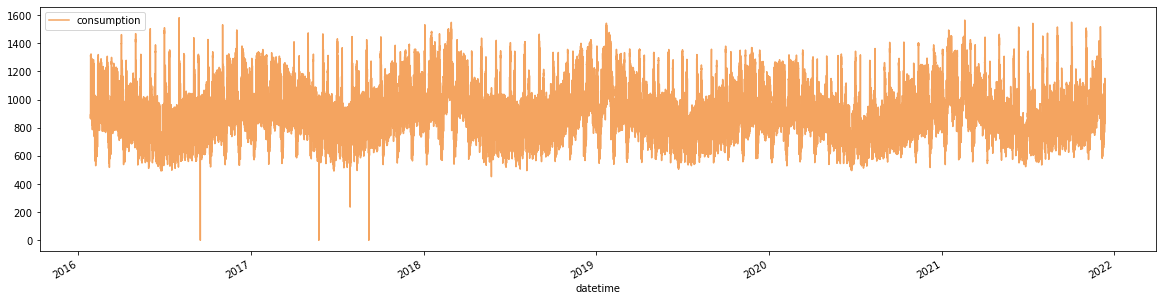

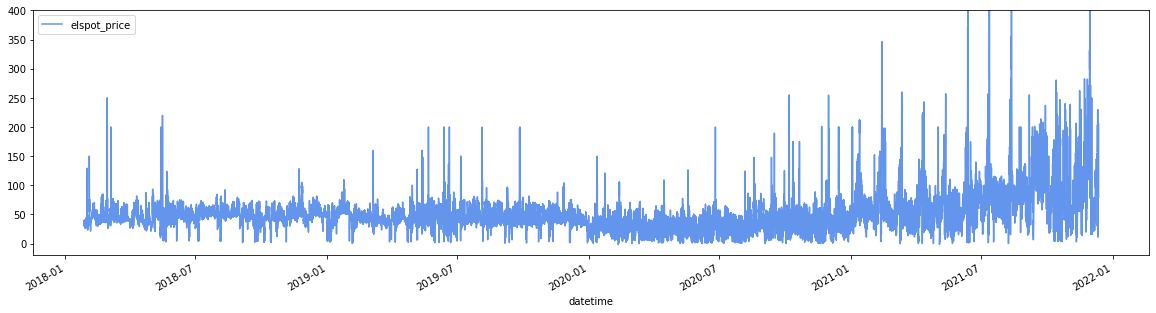

In [26]:
# Plotting the graphs
consumption = nordpool.drop("elspot_price", axis = 1)
prices = nordpool.drop("consumption", axis = 1)

consumption["2016-01-27":"2021-12-20"].plot(figsize=(20,5), color="sandybrown");
prices["2018-01-27":"2021-12-20"].plot(ylim = (-20, 400), figsize=(20, 5), color="cornflowerblue");

## First data visualization conclusions

It is clear that correlation between spot market electricity prices and energy consumption clearly exists and grows stronger over time. From around 2021-01 visible overlap is seen more and more.

## COVID-19 impact on energy consumption

### Overview 

COVID-19 had a big impact on the majority of the population and how the society functions as a system, therefore influencing the energy industry. On the macro-level, major industrial and commercial demands decrease because of the government imposed lockdowns and regulations. On the micro-level however, things are totally different. People started to work from home when possible therefore substantially increasing the residential energy demands [2]. Though it is not possible for the increased residential demand to mitigate the negative effects caused by macro-level demand decline. This implies an overall decrease in energy demand and is backed by multiple studies. For example, largest world energy demand decline since World War II happened just a year ago, in 2020 [3].

Although 2020 was a bad year for the energy industry, 2021 turned out to be a lot more positive in that regard. After relaxation of lockdown regulations, emerge of vaccines and overall societal adaptation to COVID-19, energy demand has seen a major rebound and recovery from the lows of 2020 as a result.

C:\Users\gs0057e\AppData\Local\Temp/ipykernel_19088/205892605.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mean_before = consumption[str(year - 1) + "-01-01":str(year) + "-01-01"].mean()


Text(0, 0.5, 'Change in %')

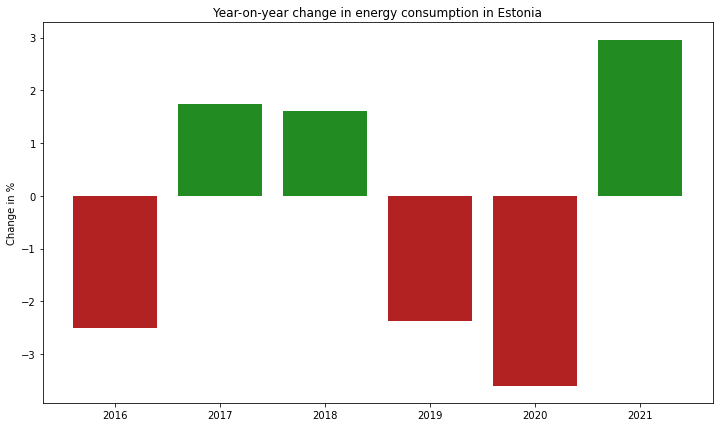

In [153]:
# Bar-chart for the 2016-2021 period
year = 2016
years = []
changes = []
colors = []

for i in range(6):
    mean_before = consumption[str(year - 1) + "-01-01":str(year) + "-01-01"].mean()
    mean_now = consumption[str(year) + "-01-01":str(year + 1) + "-01-01"].mean()
    change = float(((mean_now / mean_before) - 1) * 100)
    years.append(year)
    changes.append(change)
    year += 1
    if change < 0:
        colors.append("firebrick")
    else:
        colors.append("forestgreen")

consumption_changes = pd.DataFrame({"years":years,"changes":changes, "colors":colors})
f, ax = plt.subplots(figsize=(12,7))
plt.bar(consumption_changes["years"], consumption_changes["changes"], color=consumption_changes["colors"])
plt.title("Year-on-year change in energy consumption in Estonia")
plt.ylabel("Change in %")


As shown in the graph, Estonia is no exception to overall worldwide decrease in energy demand when the COVID-19 outbreak first occurred in 2020. The next year is also inline with the global trends in regards of energy demand stabilization and recovery from the 2020 major decrease.

In [162]:
# To be exact, change in 2020 energy consumption compared to 2019 mean is as follows (in %):
print(float(consumption_changes.loc[consumption_changes["years"] == 2020]["changes"]))

-3.596958879434209


## COVID-19 impact on electricity prices

In [12]:
# Analyse how it was before the covid, general trends, means 

# What happened after COVID-19? lockdown impact and all that

## References
1. Klemeš JJ, Fan YV, Jiang P, Impacts of COVID-19 on energy demand and consumption: Challenges, lessons and emerging opportunities https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7458120/
2.  Senthilkumar V.S., Reddy K.S., Subramaniam U. COVID-19: Impact analysis and recommendations for power and energy sector operation https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7834155/
3. Global Energy Review, https://iea.blob.core.windows.net/assets/d0031107-401d-4a2f-a48b-9eed19457335/GlobalEnergyReview2021.pdf